# QQ Plots and Log-Transformations

In [1]:
import statsmodels.api as sm
from seaborn import load_dataset
diamonds = load_dataset('diamonds')
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


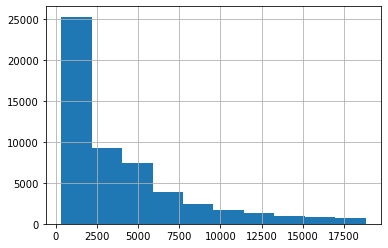

In [4]:
# Check histogram of target
diamonds['price'].hist();

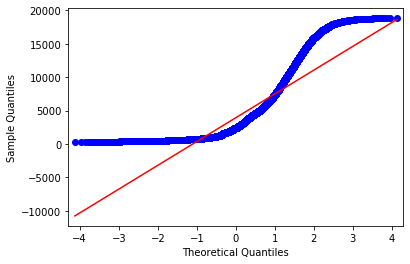

In [5]:
# Check qqplot against normal
sm.qqplot(diamonds['price'], line='r');

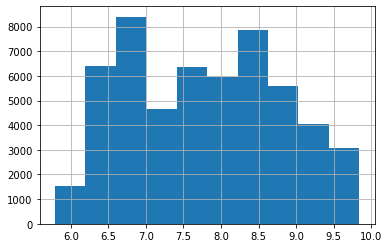

In [7]:
# Histogram of log-transformed target
np.log(diamonds['price']).hist();

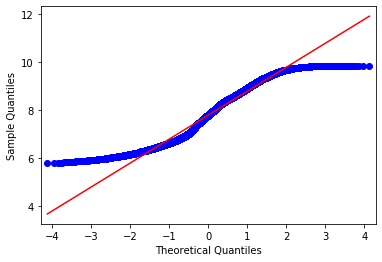

In [8]:
# QQ Plot of log-transformed target
sm.qqplot(np.log(diamonds['price']), line='r');

## QQPlots for Model Residuals

In [9]:
# Set up X, y and lr
X = diamonds[['carat']]
y = diamonds['price']
lr = LinearRegression().fit(X, y)

In [10]:
# Store model predictions
preds = lr.predict(X)

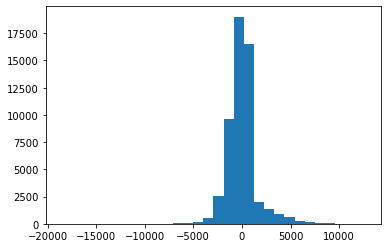

In [11]:
# Check the histogram of the residuals
resids = y - preds
fig, ax = plt.subplots()
ax.hist(resids, bins=30);

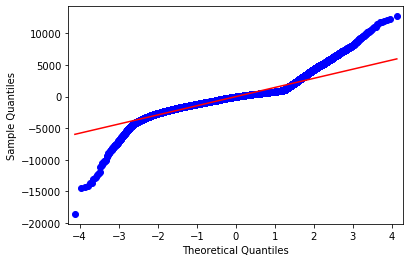

In [12]:
# Check the QQ Plot
sm.qqplot(resids, line='r');

In [13]:
# Build model on transformed target
log_target = np.log(y)
log_lr = LinearRegression().fit(X, log_target)

In [14]:
# Store predictions
log_preds = log_lr.predict(X)

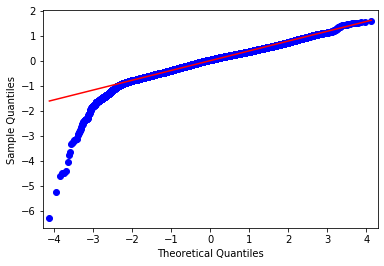

In [15]:
# New QQ Plot
sm.qqplot(log_target - log_preds, line='r');

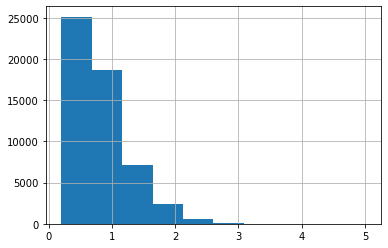

In [18]:
# What about the shape of our predictor?
diamonds['carat'].hist();

In [19]:
# Log-transform the predictor
log_carat = np.log(X)
two_logs_lr = LinearRegression().fit(log_carat, log_target)

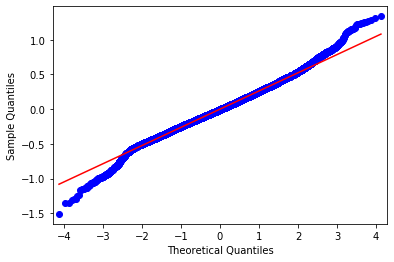

In [20]:
# QQ Plot of doubly log-transformed data
two_log_preds = two_logs_lr.predict(log_carat)
sm.qqplot(np.log(y) - two_log_preds, line='r');